# **Program 9**

Prepare a naïve bayes classification model for prediction of purchase power of a user.

Accuracy of classifier:  0.87
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89        58
           1       0.84      0.86      0.85        42

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



<Axes: >

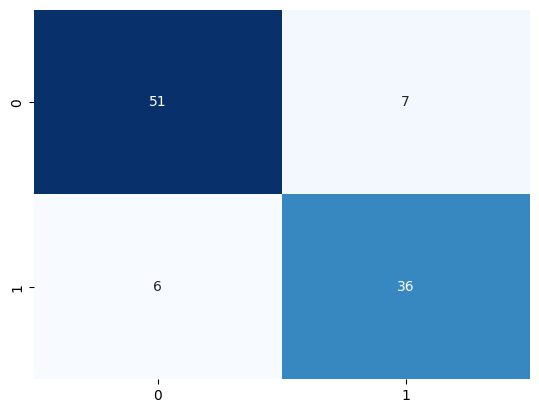

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, f1_score

# Load User_Data dataset
df = pd.read_csv('User_Data.csv')

# Drop User ID column as it does not contribute towards prediction purpose
df.drop(['User ID'], axis=1, inplace=True)

# Label Encoding
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

# Split data into dependent/independent variables
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=True)

# Scale dataset
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Create naive-bayes classifier model
classifier=GaussianNB()
classifier.fit(x_train, y_train)

# Predict the values
y_pred=classifier.predict(x_test)
# Print accuracy of classifier
print("Accuracy of classifier: ", accuracy_score(y_test, y_pred))

# Print the classification report
print(f'Classification report:\n{classification_report(y_test, y_pred)}')

# Print the confusion matrix
cf_matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)